### Lab 3_1_apriori

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load the dataset
file_path = "example_grocery_transaction_dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())

# Preprocess the data
# Convert the dataset to a format suitable for one-hot encoding
basket = df.set_index('TransactionID').stack().reset_index().drop('level_1', axis=1)
basket.columns = ['TransactionID', 'Item']

# Convert data to a one-hot encoded format
onehot_df = basket.groupby(['TransactionID', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('TransactionID')
onehot_df = onehot_df.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(onehot_df, min_support=0.2, use_colnames=True)

# Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Print frequent itemsets and association rules
print("\nFrequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


Original Dataset:
   TransactionID Items1   Items2   Items3 Items4
0              1  Apple   Banana   Cereal    NaN
1              2  Apple   Banana     Milk    NaN
2              3  Apple   Banana   Cereal   Milk
3              4  Apple     Milk      NaN    NaN
4              5  Apple   Cereal      NaN    NaN

Frequent Itemsets:
    support                          itemsets
0       0.6                         ( Banana)
1       0.6                         ( Cereal)
2       0.5                           ( Milk)
3       0.8                           (Apple)
4       0.2                          (Banana)
5       0.4                ( Cereal,  Banana)
6       0.3                  ( Milk,  Banana)
7       0.6                  (Apple,  Banana)
8       0.2                  ( Milk,  Cereal)
9       0.5                  (Apple,  Cereal)
10      0.4                    ( Milk, Apple)
11      0.2         ( Milk,  Cereal,  Banana)
12      0.4         (Apple,  Cereal,  Banana)
13      0.3           ( 

c:\Users\huynh\.conda\envs\data_mining\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
c:\Users\huynh\.conda\envs\data_mining\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


### Lab 3_1_kmeans

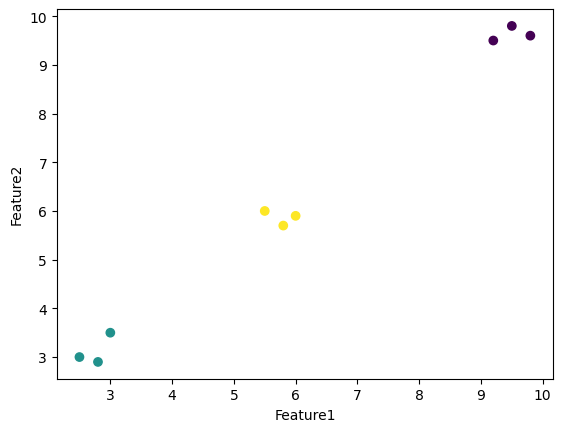

In [3]:
# Import necessary libraries
import pandas as pd

# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the sample dataset (replace with your dataset file)
df = pd.read_csv("example_features_dataset.csv")

# Data preprocessing (cleaning, missing value handling, feature selection)
# Example: Removing rows with missing values
df = df.dropna()

# Assuming your dataset is already preprocessed and features are selected
# Assuming you have selected two features "Feature1" and "Feature2"
data = df[["Feature1", "Feature2"]]

# Apply K-Means clustering to the data
kmeans = KMeans(n_clusters=3)  # Specify the number of clusters
kmeans.fit(data)
df["Cluster"] = kmeans.labels_  # Assign clusters to data points

# Visualize the clusters (optional)
plt.scatter(data["Feature1"], data["Feature2"], c=df["Cluster"], cmap='viridis')
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()





### Lab 3_1_prefixspan

In [4]:
import pandas as pd
from prefixspan import PrefixSpan

# Load the dataset
file_path = "example_sequenceid_dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())

# Preprocess the data
# Combine the actions into a list for each SequenceID
df['Actions'] = df[['Actions1', 'Actions2', 'Actions3', 'Actions4']].values.tolist()
df = df.drop(columns=['Actions1', 'Actions2', 'Actions3', 'Actions4'])
df['Actions'] = df['Actions'].apply(lambda x: [i.strip() for i in x if pd.notna(i)])

# Convert data to a list of sequences
sequences = df['Actions'].tolist()

# Apply PrefixSpan algorithm to discover sequential patterns
ps = PrefixSpan(sequences)
patterns = ps.frequent(2)  # Discover sequences occurring at least twice

# Print sequential patterns
print("\nSequential Patterns:")
for pattern in patterns:
    print("Pattern:", pattern)


Original Dataset:
   SequenceID Actions1 Actions2 Actions3 Actions4
0           1        A        B        C        D
1           2        A        C        D      NaN
2           3        B        D      NaN      NaN
3           4        A        D      NaN      NaN
4           5        A        B        C      NaN

Sequential Patterns:
Pattern: (7, ['A'])
Pattern: (4, ['A', 'B'])
Pattern: (2, ['A', 'B', 'C'])
Pattern: (2, ['A', 'B', 'D'])
Pattern: (4, ['A', 'C'])
Pattern: (3, ['A', 'C', 'D'])
Pattern: (5, ['A', 'D'])
Pattern: (6, ['B'])
Pattern: (3, ['B', 'C'])
Pattern: (3, ['B', 'D'])
Pattern: (6, ['C'])
Pattern: (4, ['C', 'D'])
Pattern: (7, ['D'])


### Lab 3_2_kmeans

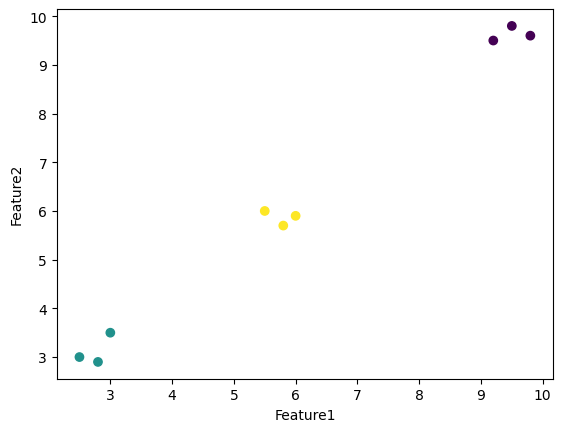

Silhouette Score: 0.8913671289874474
WCSS:
Cluster 1: 132.9177777777778
Cluster 2: 25.44
Cluster 3: 0.7333333333333344
Cluster 4: 0.45000000000000107
Cluster 5: 0.28833333333333366
Cluster 6: 0.15500000000000044
Cluster 7: 0.09000000000000002
Cluster 8: 0.04000000000000007
Cluster 9: 0.0


In [5]:
# Import necessary libraries
import pandas as pd

# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Load the sample dataset (replace with your dataset file)
df = pd.read_csv("example_features_dataset.csv")

# Data preprocessing (cleaning, missing value handling, feature selection)
# Example: Removing rows with missing values
df = df.dropna()

# Assuming your dataset is already preprocessed and features are selected
# Assuming you have selected two features "Feature1" and "Feature2"
data = df[["Feature1", "Feature2"]]

# Apply K-Means clustering to the data
kmeans = KMeans(n_clusters=3)  # Specify the number of clusters
kmeans.fit(data)
df["Cluster"] = kmeans.labels_  # Assign clusters to data points

# Visualize the clusters (optional)
plt.scatter(data["Feature1"], data["Feature2"], c=df["Cluster"], cmap='viridis')
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

# Evaluate the quality of clusters using silhouette score
silhouette_avg = silhouette_score(data, df['Cluster'])
print("Silhouette Score:", silhouette_avg)

# You can also calculate within-cluster sum of squares (WCSS) to help choose the number of clusters
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Print the WCSS values
print("WCSS:")
for i, value in enumerate(wcss):
    print(f"Cluster {i+1}: {value}")




### Lab 3_2_prefixspan

In [6]:
import pandas as pd
from prefixspan import PrefixSpan

# Load the dataset
file_path = "example_sequenceid_dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())

# Preprocess the data
# Combine the actions into a list for each SequenceID
df['Actions'] = df[['Actions1', 'Actions2', 'Actions3', 'Actions4']].values.tolist()
df = df.drop(columns=['Actions1', 'Actions2', 'Actions3', 'Actions4'])
df['Actions'] = df['Actions'].apply(lambda x: [i.strip() for i in x if pd.notna(i)])

# Convert data to a list of sequences
sequences = df['Actions'].tolist()

# Apply PrefixSpan algorithm to discover sequential patterns
ps = PrefixSpan(sequences)
patterns = ps.frequent(2)  # Discover sequences occurring at least twice

# Print sequential patterns
print("\nSequential Patterns:")
for pattern in patterns:
    print("Pattern:", pattern)

# Evaluate and filter patterns based on specific criteria
min_support = 2
max_length = 4

filtered_patterns = [pattern for pattern in patterns if pattern[0] >= min_support and len(pattern[1]) <= max_length]

# Print the filtered patterns
print("Filtered Sequential Patterns:")
for pattern in filtered_patterns:
    print("Pattern:", pattern[1], "Support:", pattern[0])


Original Dataset:
   SequenceID Actions1 Actions2 Actions3 Actions4
0           1        A        B        C        D
1           2        A        C        D      NaN
2           3        B        D      NaN      NaN
3           4        A        D      NaN      NaN
4           5        A        B        C      NaN

Sequential Patterns:
Pattern: (7, ['A'])
Pattern: (4, ['A', 'B'])
Pattern: (2, ['A', 'B', 'C'])
Pattern: (2, ['A', 'B', 'D'])
Pattern: (4, ['A', 'C'])
Pattern: (3, ['A', 'C', 'D'])
Pattern: (5, ['A', 'D'])
Pattern: (6, ['B'])
Pattern: (3, ['B', 'C'])
Pattern: (3, ['B', 'D'])
Pattern: (6, ['C'])
Pattern: (4, ['C', 'D'])
Pattern: (7, ['D'])
Filtered Sequential Patterns:
Pattern: ['A'] Support: 7
Pattern: ['A', 'B'] Support: 4
Pattern: ['A', 'B', 'C'] Support: 2
Pattern: ['A', 'B', 'D'] Support: 2
Pattern: ['A', 'C'] Support: 4
Pattern: ['A', 'C', 'D'] Support: 3
Pattern: ['A', 'D'] Support: 5
Pattern: ['B'] Support: 6
Pattern: ['B', 'C'] Support: 3
Pattern: ['B', 'D'] Suppor

### Lab 3_2_RuleMining

In [7]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load the dataset
file_path = "example_grocery_transaction_dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())

# Data preprocessing
# Combine all item columns into a list for each transaction
df['Items'] = df[['Items1', 'Items2', 'Items3', 'Items4']].values.tolist()

# Remove NaN values and ensure items are correctly formatted
df['Items'] = df['Items'].apply(lambda x: [item for item in x if pd.notna(item)])

# Convert data to a one-hot encoded format
onehot_df = df['Items'].apply(lambda x: pd.Series(1, index=x)).fillna(0)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(onehot_df, min_support=0.2, use_colnames=True)

# Check if frequent_itemsets is empty
if frequent_itemsets.empty:
    print("No frequent itemsets found. Try lowering the minimum support threshold.")
else:
    # Generate association rules from frequent itemsets
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

    # Print frequent itemsets and association rules
    print("Frequent Itemsets:")
    print(frequent_itemsets)

    print("\nAssociation Rules:")
    print(rules)

    # Evaluate and filter rules based on specific metrics
    min_support = 0.1
    min_confidence = 0.5
    min_lift = 1.0

    filtered_rules = rules[(rules['support'] >= min_support) & (rules['confidence'] >= min_confidence) & (rules['lift'] >= min_lift)]

    # Print the filtered rules
    print("Filtered Association Rules:")
    print(filtered_rules)


Original Dataset:
   TransactionID Items1   Items2   Items3 Items4
0              1  Apple   Banana   Cereal    NaN
1              2  Apple   Banana     Milk    NaN
2              3  Apple   Banana   Cereal   Milk
3              4  Apple     Milk      NaN    NaN
4              5  Apple   Cereal      NaN    NaN
Frequent Itemsets:
    support                          itemsets
0       0.8                           (Apple)
1       0.6                         ( Banana)
2       0.6                         ( Cereal)
3       0.5                           ( Milk)
4       0.2                          (Banana)
5       0.6                  (Apple,  Banana)
6       0.5                  (Apple,  Cereal)
7       0.4                    ( Milk, Apple)
8       0.4                ( Cereal,  Banana)
9       0.3                  ( Milk,  Banana)
10      0.2                  ( Milk,  Cereal)
11      0.4         (Apple,  Cereal,  Banana)
12      0.3           ( Milk, Apple,  Banana)
13      0.2           ( M

c:\Users\huynh\.conda\envs\data_mining\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


### Lab 3_3_Sequential_Pattern_Mining

In [8]:
from prefixspan import PrefixSpan
import pandas as pd

# Read the dataset from a CSV file
file_path = "customer_transactions_dataset.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Original Dataset:")
print(data.head())

# Combine sequence columns into a list for each transaction
data['Sequence'] = data[['Sequence1', 'Sequence2', 'Sequence3', 'Sequence4']].values.tolist()

# Remove NaN values and ensure items are correctly formatted
data['Sequence'] = data['Sequence'].apply(lambda x: [item for item in x if pd.notna(item)])

# Extract sequences and item labels
sequences = data['Sequence'].tolist()
item_labels = list(set(item for seq in sequences for item in seq))

# Create a mapping of item labels to integers for efficient pattern representation
item_to_int = {item: i for i, item in enumerate(item_labels)}

# Convert the sequences to a list of integer sequences
sequences_int = [[item_to_int[item] for item in seq] for seq in sequences]

# Apply PrefixSpan algorithm to discover frequent sequential patterns
ps = PrefixSpan(sequences_int)

# Discover frequent sequential patterns (e.g., with a minimum support of 2)
min_support = 2
patterns = ps.frequent(min_support)

# Create a DataFrame to store the patterns and their support
pattern_data = {
    "Pattern": [", ".join(item_labels[i] for i in pattern[1]) for pattern in patterns],
    "Support": [pattern[0] for pattern in patterns],
    "Pattern Length": [len(pattern[1]) for pattern in patterns],
}

result_df = pd.DataFrame(pattern_data)

# Print the frequent sequential patterns and save them to a CSV file
print("Frequent Sequential Patterns:")
print(result_df)

# Save the results to a CSV file
result_df.to_csv("frequent_patterns.csv", index=False)


Original Dataset:
   TransactionID Sequence1 Sequence2 Sequence3 Sequence4
0              1     Apple    Banana    Cereal     Donut
1              2     Apple    Cereal     Donut       NaN
2              3    Banana     Donut       NaN       NaN
3              4     Apple     Donut       NaN       NaN
4              5     Apple    Banana    Cereal       NaN
Frequent Sequential Patterns:
                    Pattern  Support  Pattern Length
0                     Apple        7               1
1            Apple,  Banana        4               2
2   Apple,  Banana,  Cereal        2               3
3    Apple,  Banana,  Donut        2               3
4            Apple,  Cereal        4               2
5    Apple,  Cereal,  Donut        3               3
6             Apple,  Donut        5               2
7                    Banana        4               1
8           Banana,  Cereal        2               2
9            Banana,  Donut        2               2
10                   Cereal

### Lab 3_4_MiningQualityPhrases

In [11]:
from collections import Counter
import math
import pandas as pd

# Create a sample dataset of product reviews
data = {
    "ReviewID": [1, 2, 3, 4, 5, 6],
    "ReviewText": [
        "This product is amazing and of great quality",
        "I love the design and the quality is excellent",
        "Amazing product with excellent build quality",
        "The design is sleek and the quality is top-notch",
        "High quality and beautiful design, very satisfied",
        "anh da den du cang qua ca li"
    ]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Save the sample dataset to a CSV file
file_path = "sample_product_reviews.csv"
df.to_csv(file_path, index=False)

# Load the text dataset from the CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Original Dataset:")
print(data.head())

# Extract review text from the DataFrame
reviews = data["ReviewText"].dropna().tolist()

# Tokenize the text into words
def tokenize(text):
    return text.lower().split()

# Calculate the PMI for all pairs of words
def calculate_pmi(texts):
    word_count = Counter()
    pair_count = Counter()
    
    for text in texts:
        words = tokenize(text)
        word_count.update(words)
        pairs = set()
        
        for i in range(len(words) - 1):
            for j in range(i + 1, len(words)):
                pair = (words[i], words[j])
                pairs.add(pair)
        
        pair_count.update(pairs)
    
    pmi = {}
    
    for pair, count in pair_count.items():
        word1, word2 = pair
        pmi[pair] = math.log((count * len(texts)) / (word_count[word1] * word_count[word2]))
    
    return pmi

# Extract meaningful quality phrases based on PMI
def extract_quality_phrases(pmi, threshold=1.0):
    quality_phrases = []
    
    for pair, score in pmi.items():
        if score >= threshold:
            quality_phrases.append(" ".join(pair))
    
    return quality_phrases

# Calculate PMI and extract quality phrases
pmi_scores = calculate_pmi(reviews)
threshold = 1.0  # Adjust the threshold as needed
quality_phrases = extract_quality_phrases(pmi_scores, threshold)

# Print quality phrases
print("Quality Phrases:")
for phrase in quality_phrases:
    print(phrase)


Original Dataset:
   ReviewID                                         ReviewText
0         1       This product is amazing and of great quality
1         2     I love the design and the quality is excellent
2         3       Amazing product with excellent build quality
3         4   The design is sleek and the quality is top-notch
4         5  High quality and beautiful design, very satisfied
Quality Phrases:
product great
this great
product of
this of
this product
this amazing
amazing great
amazing of
of great
love design
i excellent
i design
i love
love excellent
excellent build
product with
product build
amazing with
amazing build
with build
with excellent
design sleek
sleek top-notch
design top-notch
high satisfied
design, satisfied
beautiful design,
very satisfied
beautiful very
beautiful satisfied
high beautiful
high design,
high very
design, very
du cang
anh du
anh li
da du
da li
qua li
den qua
den ca
anh cang
cang qua
da cang
cang ca
den du
anh den
den li
ca li
da den
anh da
ca